In [25]:
import sys
import importlib
import Monty
import Hmm
import numpy as np
import time
import pandas as pd
import datetime
import matplotlib.pyplot as plt 
import numpy as np
import yfinance as yf
import numpy as np
import pandas as pd
import yfinance as yf

import numpy as np
import pandas as pd
import yfinance as yf

def process_stock_data(stock, start_date, end_date):
    """
    Download stock data, process it, and store the mean-adjusted returns.
    
    Parameters:
    - stocks: A list of stock ticker symbols.
    
    Returns:
    - mean_return: A pandas Series of mean-adjusted returns for each stock.
    - data: A DataFrame of mean-adjusted returns with stock tickers as column titles.
    """

    # Download the stock data
    data = yf.download(stocks, start=start_date, end=end_date, interval='1wk')['Adj Close']

    # Forward fill to handle NaN values that might occur
    data.ffill(inplace=True)

    # Take the log of closing prices and then the first difference, multiply by 100
    log_returns = np.log(data + 1e-6).diff().dropna() * 100

    # Handling infinite values by replacing them with NaN
    log_returns.replace([np.inf, -np.inf], np.nan, inplace=True)

    # Optionally, drop rows with any NaN values after handling infinite values
    log_returns.dropna(inplace=True)

    # Calculate the mean of each stock
    mean_returns = log_returns.mean()

    # Subtract the mean from each stock's log returns
    mean_adjusted_data = log_returns - mean_returns

    return mean_returns, mean_adjusted_data

start_date = '2014-01-01'
end_date = '2024-01-01'

# Example usage
stocks = ['ACWI', 'MINV.L', 'SPY', 'TLT',] #,'IBGL.AS']# #,'SPY',]#, 'AAPL', 'GOOGL', 'MSFT', 'AMZN','TLT',]#
mean_returns, data = process_stock_data(stocks, start_date, end_date)

print(data.head())

# def process_stock_data(stocks):
#     """
#     Download stock data, process it, and store the mean-adjusted returns.

#     Parameters:
#     - stocks: A list of stock ticker symbols.

#     Returns:
#     - mean_return: A numpy array of mean-adjusted returns for each stock.
#     """
#     # Define the start and end dates
#     start_date = '2014-01-01'
#     end_date = '2024-01-01'

#     # Download the stock data
#     data = yf.download(stocks, start=start_date, end=end_date)

#     # Take the log of closing prices and then the first difference, multiply by 100
#     log_returns = np.log(data['Close'] + 1e-6).diff().dropna() * 100
#     log_returns = log_returns.to_numpy()
#     # Calculate the mean of each stock
#     mean_returns = np.mean(log_returns, axis=0)

#     # Subtract the mean from each stock's log returns
#     data = pd.DataFrame(log_returns - mean_returns)
    

#     return mean_returns, data

# # Example usage
# stocks = ['ACWI', 'MINV.L', 'IBGL.AS', 'SHY'] # ['AAPL', 'GOOGL', 'MSFT', 'AMZN']
# mean_returns, data = process_stock_data(stocks)

# print(data.describe())


[*********************100%%**********************]  4 of 4 completed
                ACWI    MINV.L       SPY       TLT
Date                                              
2014-01-08  0.287460 -0.352692 -0.113891  1.495308
2014-01-15  0.093655 -0.212781  0.059935  1.018427
2014-01-22 -3.091914 -2.911432 -3.031070  1.306981
2014-01-29 -2.571302 -0.530886 -2.293905  1.048954
2014-02-05  3.803611  1.817590  3.471095 -1.358295


 11%|████▌                                     | 33/300 [00:00<00:05, 46.97it/s]


Model Converged at iteration:  33


/home/august/code/jupyter/Thesis/Projects/Libraries/Hmm.py:672: RuntimeWarning: overflow encountered in exp
  densities = np.exp(log_densities)


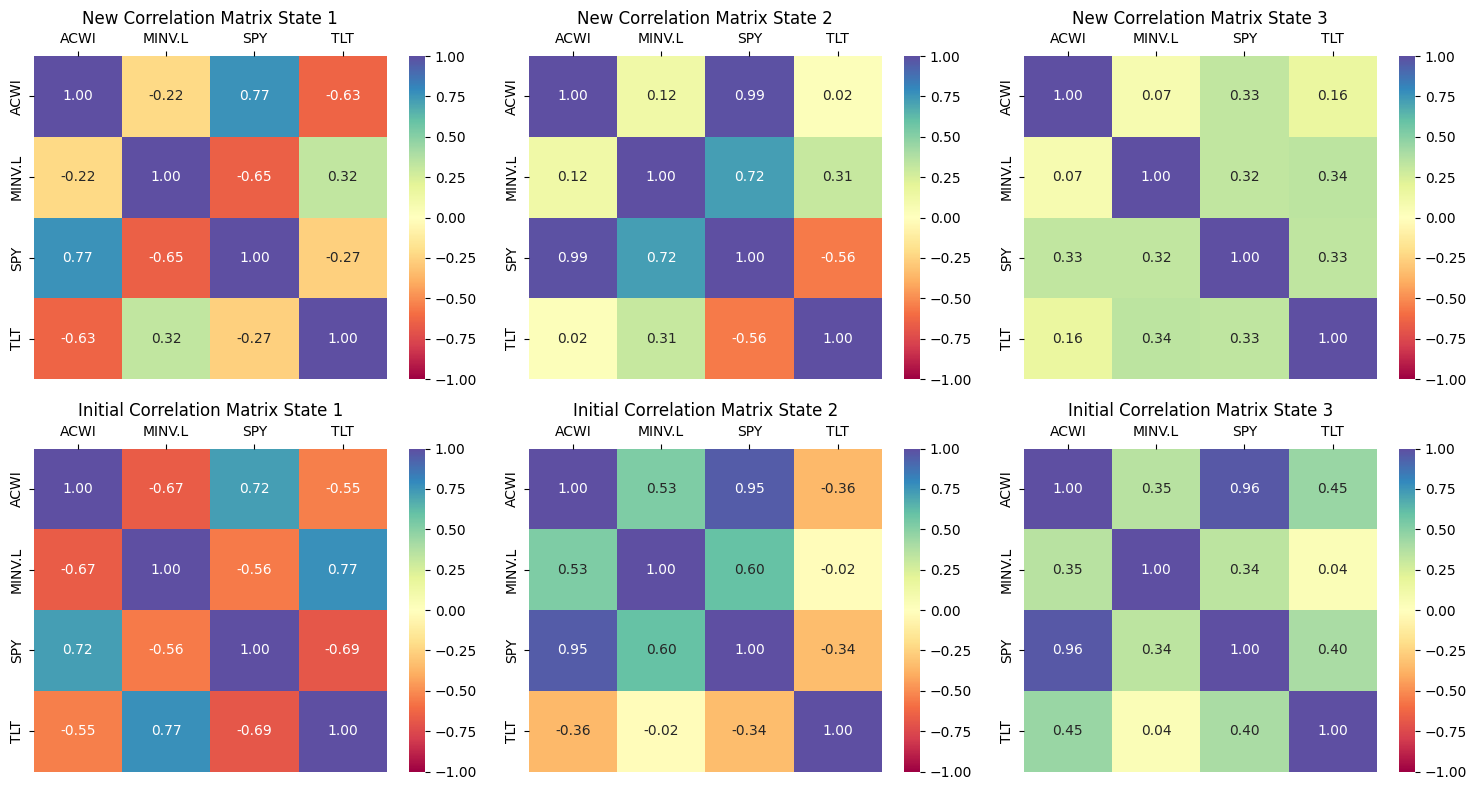

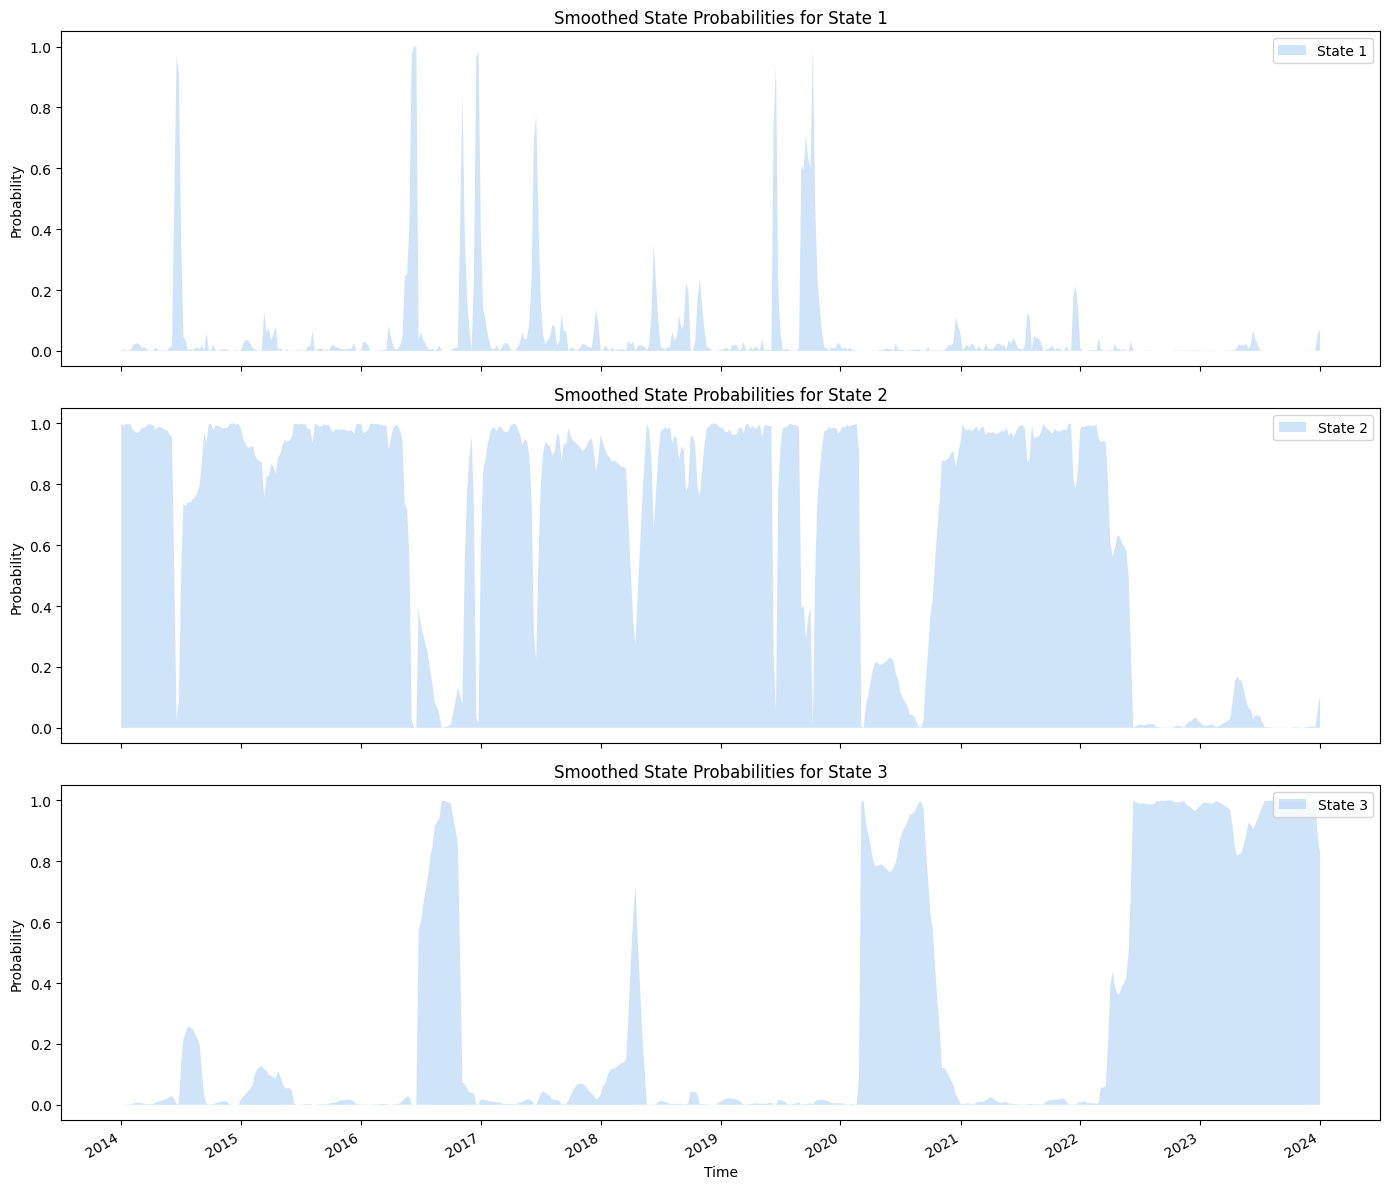

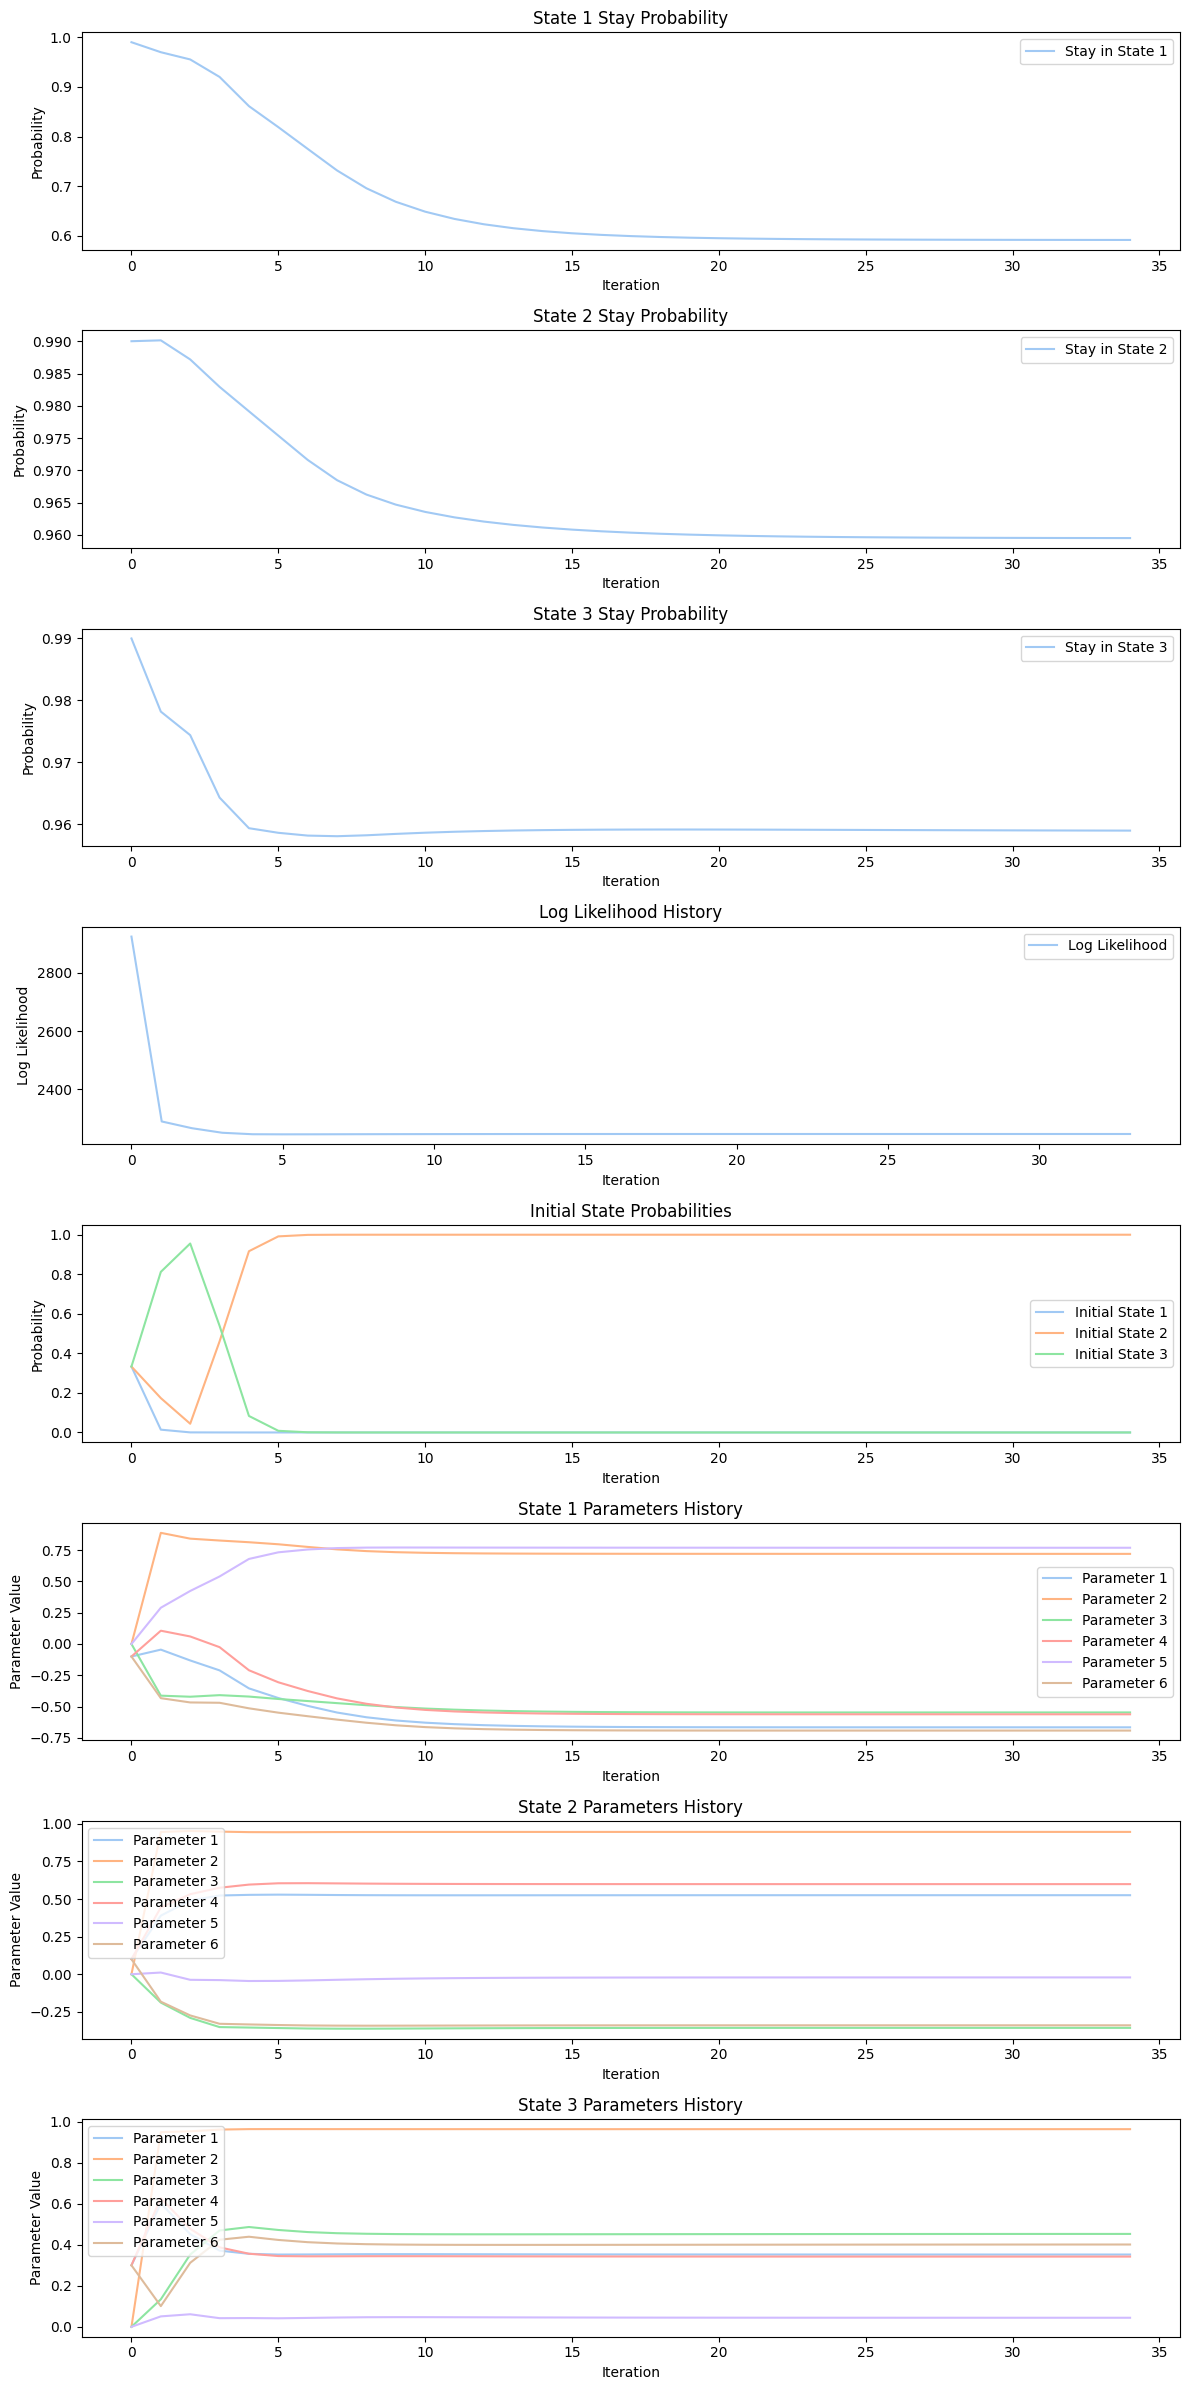

(array([[[ 1.        , -0.22115632,  0.76516006, -0.63447449],
         [-0.22115632,  1.        , -0.64997812,  0.32075555],
         [ 0.76516006, -0.64997812,  1.        , -0.26547543],
         [-0.63447449,  0.32075555, -0.26547543,  1.        ]],
 
        [[ 1.        ,  0.12180874,  0.9896236 ,  0.02382001],
         [ 0.12180874,  1.        ,  0.72149463,  0.30657994],
         [ 0.9896236 ,  0.72149463,  1.        , -0.55727356],
         [ 0.02382001,  0.30657994, -0.55727356,  1.        ]],
 
        [[ 1.        ,  0.07197899,  0.32778843,  0.16157516],
         [ 0.07197899,  1.        ,  0.32268025,  0.33939181],
         [ 0.32778843,  0.32268025,  1.        ,  0.33307133],
         [ 0.16157516,  0.33939181,  0.33307133,  1.        ]]]),)

In [26]:
importlib.reload(Hmm)
from Hmm import Base

model = Base(data, max_iterations=300, n_states=3, num_cal = 100)
model.flashy_fit()
model.numeric_corr()
model.plot_correlation_matrices(both=True)
model.plot_smoothed_probabilities(start_date=start_date, end_date=end_date)
model.plot_histories()
model.new_correlation_matrix, 


In [27]:
model.result

  message: ABNORMAL_TERMINATION_IN_LNSRCH
  success: False
   status: 2
      fun: -6611.962009786988
        x: [-2.212e-01  7.652e-01 ...  3.394e-01  3.331e-01]
      nit: 4
      jac: [ 1.264e+07  2.072e+07 ...  5.214e+01 -1.248e+01]
     nfev: 1330
     njev: 70
 hess_inv: <18x18 LbfgsInvHessProduct with dtype=float64>

In [28]:
model.transition_matrix

array([[0.59171446, 0.36436076, 0.04392478],
       [0.02995921, 0.95951156, 0.01052923],
       [0.00970303, 0.03130739, 0.95898958]])

Expectation Maximization: 100%|███████████████| 300/300 [00:16<00:00, 18.17it/s]


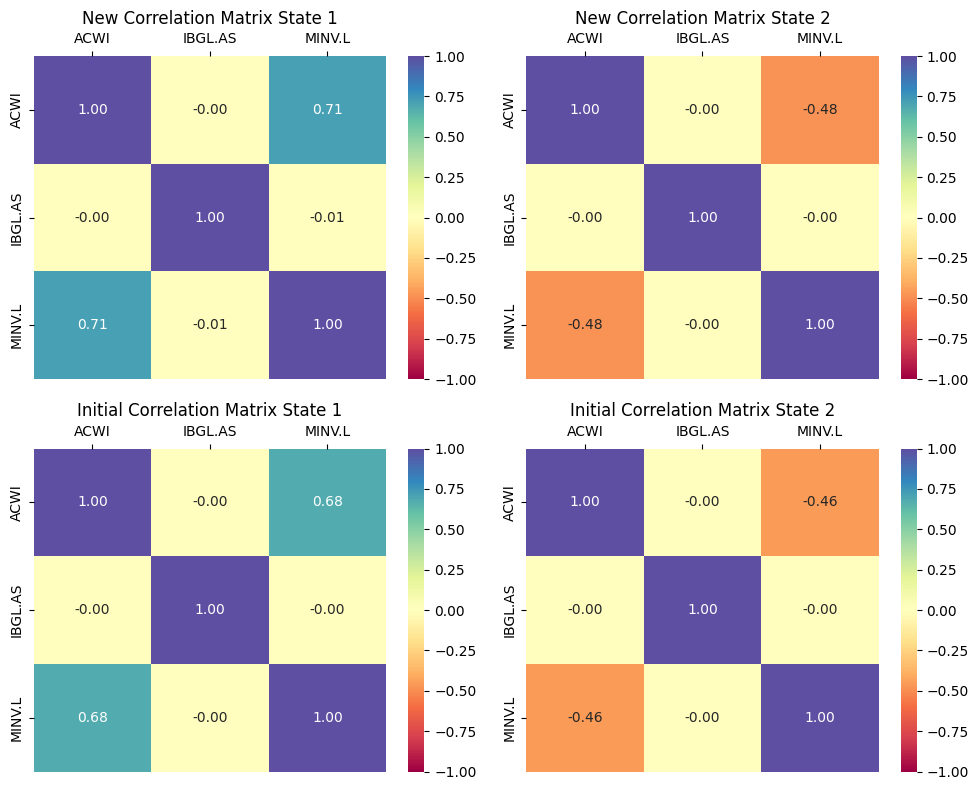

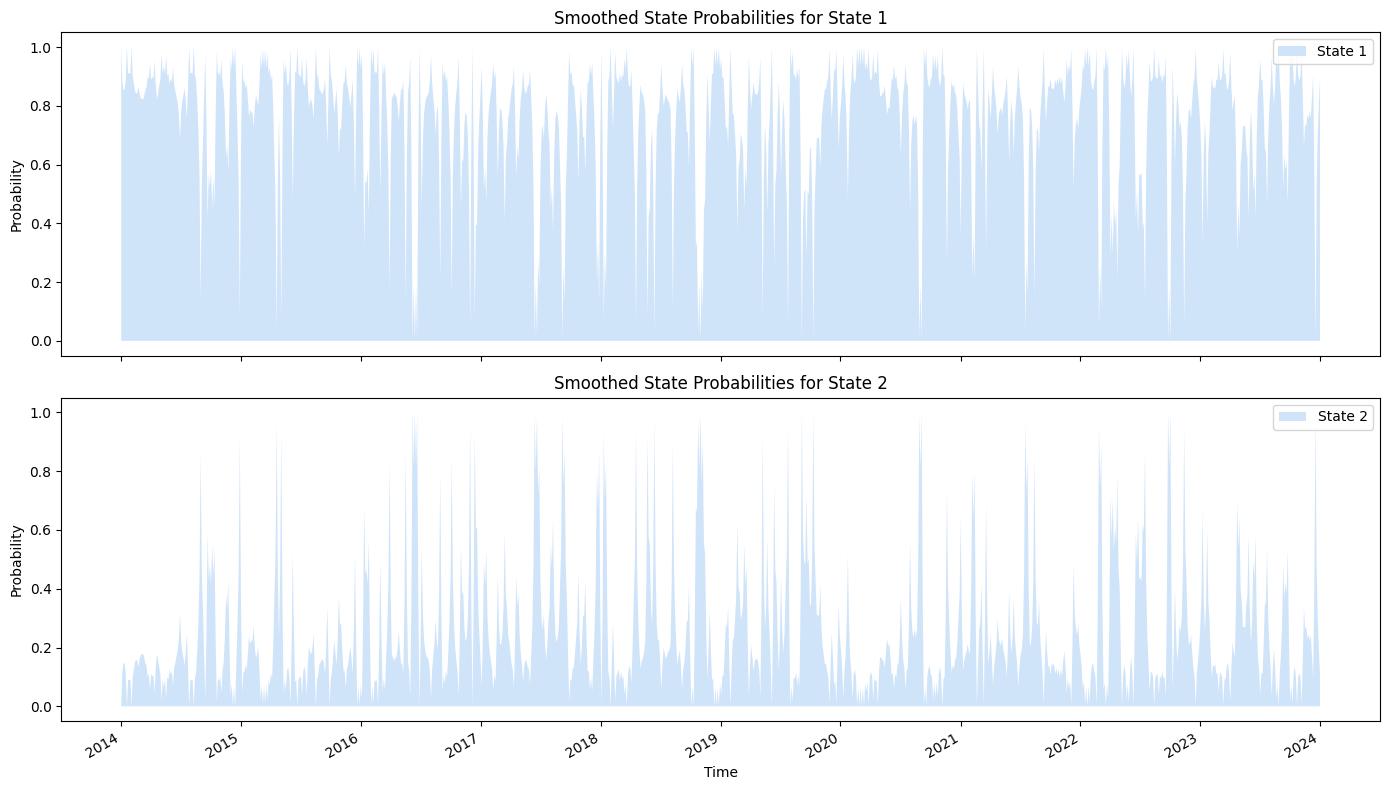

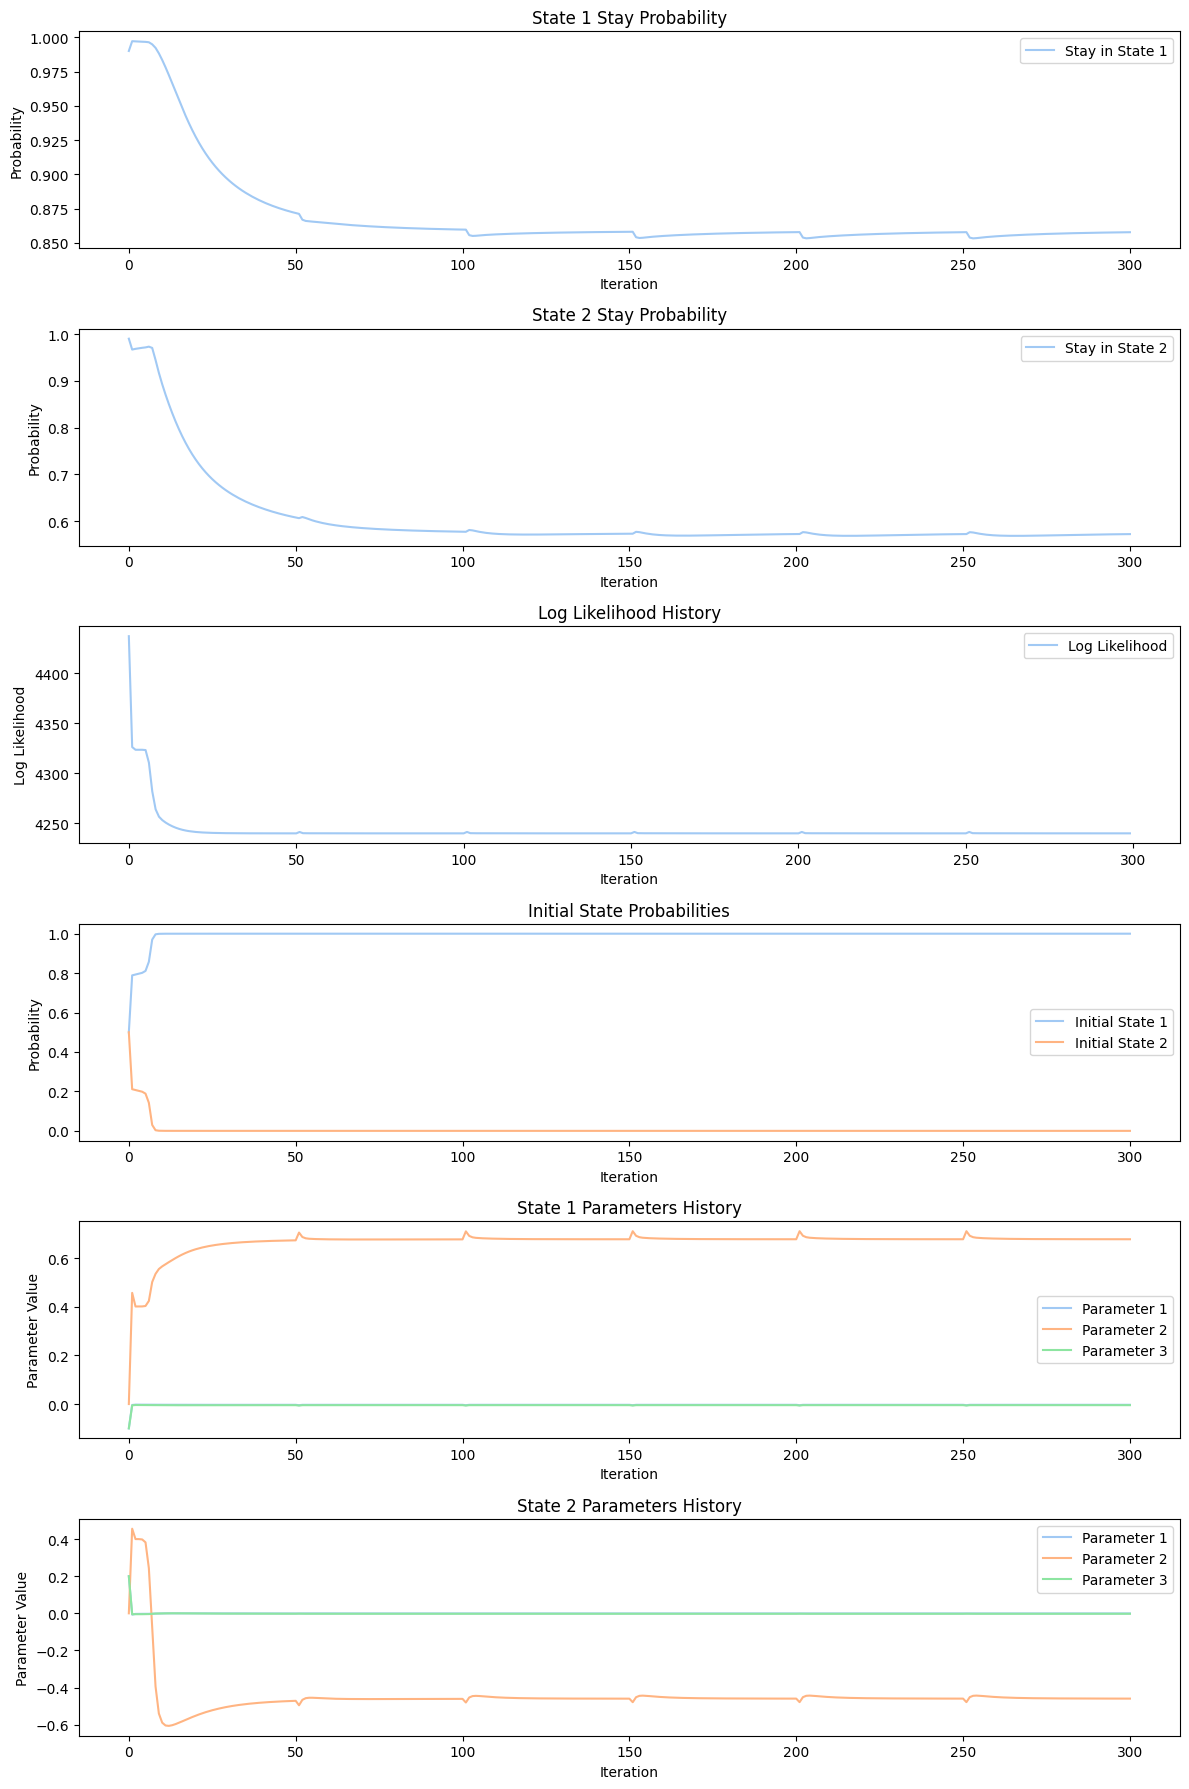

(array([[[ 1.00000000e+00, -4.67118789e-03,  7.11364428e-01],
         [-4.67118789e-03,  1.00000000e+00, -6.02509400e-03],
         [ 7.11364428e-01, -6.02509400e-03,  1.00000000e+00]],
 
        [[ 1.00000000e+00, -8.82396861e-04, -4.78498469e-01],
         [-8.82396861e-04,  1.00000000e+00, -1.97962597e-03],
         [-4.78498469e-01, -1.97962597e-03,  1.00000000e+00]]]),)

In [7]:
importlib.reload(Hmm)
from Hmm import Base

model1 = Base(data, max_iterations=300, n_states=2, num_cal=50)
model1.num_fit()
model1.numeric_corr()
model1.plot_correlation_matrices(both=True)
model1.plot_smoothed_probabilities(start_date=start_date, end_date=end_date)
model1.plot_histories()
model1.new_correlation_matrix, 
